In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math

In [2]:
str_files = ''

#df = pd.read_csv(str_files + "ph.csv",encoding='utf-8',sep=';')
dateparse = lambda dates:pd.datetime.strptime(dates,'%d/%m/%Y')
df = pd.read_csv(str_files + 'ph.csv',encoding='utf-8',sep=';', parse_dates = ['data_coleta'],index_col=['data_coleta'],date_parser=dateparse)

In [3]:
z = df.loc[df['UGRHI'] == '10 - SOROCABA/MEDIO TIETE']
#z.info()

In [4]:
z = z.dropna(axis=1,how='any')

In [5]:
trainingd = z.resample('3M').mean()
train = trainingd.iloc[:,1:2].values
print(len(train))

166


In [6]:
sc = MinMaxScaler()
train = sc.fit_transform(train)

In [7]:
def prepare_data(data, lags):
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)  

In [8]:
test_set = df.loc[df['UGRHI'] == '06 - ALTO TIÊTE']
test_set = test_set.dropna(axis=1,how='any')
#for field in test_set.columns:
    #print(field,'NaN',test_set[field].isnull().sum())
    
test_set = test_set.resample('3M').mean()
test = test_set.iloc[:,1:2].values
print(len(test))

168


In [9]:
sc = MinMaxScaler()
test = sc.fit_transform(test)

In [10]:
lags =33
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test   
print(len(X_train))

132


In [14]:
lags = 33
mdl = Sequential()
mdl.add(Dense(10, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Train on 132 samples
Epoch 1/100
132/132 - 1s - loss: 0.0302
Epoch 2/100
132/132 - 0s - loss: 0.0281
Epoch 3/100
132/132 - 0s - loss: 0.0281
Epoch 4/100
132/132 - 0s - loss: 0.0278
Epoch 5/100
132/132 - 0s - loss: 0.0273
Epoch 6/100
132/132 - 0s - loss: 0.0274
Epoch 7/100
132/132 - 0s - loss: 0.0272
Epoch 8/100
132/132 - 0s - loss: 0.0269
Epoch 9/100
132/132 - 0s - loss: 0.0268
Epoch 10/100
132/132 - 0s - loss: 0.0267
Epoch 11/100
132/132 - 0s - loss: 0.0268
Epoch 12/100
132/132 - 0s - loss: 0.0267
Epoch 13/100
132/132 - 0s - loss: 0.0264
Epoch 14/100
132/132 - 0s - loss: 0.0260
Epoch 15/100
132/132 - 0s - loss: 0.0260
Epoch 16/100
132/132 - 0s - loss: 0.0259
Epoch 17/100
132/132 - 0s - loss: 0.0257
Epoch 18/100
132/132 - 0s - loss: 0.0256
Epoch 19/100
132/132 - 0s - loss: 0.0256
Epoch 20/100
132/132 - 0s - loss: 0.0256
Epoch 21/100
132/132 - 0s - loss: 0.0260
Epoch 22/100
132/132 - 0s - loss: 0.0257
Epoch 23/100
132/132 - 0s - loss: 0.0252
Epoch 24/100
132/132 - 0s - loss: 0.0249
Epoc

In [15]:
train_score10 = mdl.evaluate(X_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score10, math.sqrt(train_score10)))
test_score10 = mdl.evaluate(X_test, y_test, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score10, math.sqrt(test_score10)))

Pontuação de Treino: 0.02 MSE (0.14 RMSE)
Pontuação de teste: 0.01 MSE (0.10 RMSE)


In [16]:
lags = 33
mdl = Sequential()
mdl.add(Dense(25, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Train on 132 samples
Epoch 1/100
132/132 - 1s - loss: 0.2828
Epoch 2/100
132/132 - 0s - loss: 0.0863
Epoch 3/100
132/132 - 0s - loss: 0.0517
Epoch 4/100
132/132 - 0s - loss: 0.0634
Epoch 5/100
132/132 - 0s - loss: 0.0553
Epoch 6/100
132/132 - 0s - loss: 0.0465
Epoch 7/100
132/132 - 0s - loss: 0.0448
Epoch 8/100
132/132 - 0s - loss: 0.0445
Epoch 9/100
132/132 - 0s - loss: 0.0427
Epoch 10/100
132/132 - 0s - loss: 0.0418
Epoch 11/100
132/132 - 0s - loss: 0.0407
Epoch 12/100
132/132 - 0s - loss: 0.0382
Epoch 13/100
132/132 - 0s - loss: 0.0370
Epoch 14/100
132/132 - 0s - loss: 0.0364
Epoch 15/100
132/132 - 0s - loss: 0.0349
Epoch 16/100
132/132 - 0s - loss: 0.0341
Epoch 17/100
132/132 - 0s - loss: 0.0340
Epoch 18/100
132/132 - 0s - loss: 0.0333
Epoch 19/100
132/132 - 0s - loss: 0.0331
Epoch 20/100
132/132 - 0s - loss: 0.0321
Epoch 21/100
132/132 - 0s - loss: 0.0315
Epoch 22/100
132/132 - 0s - loss: 0.0315
Epoch 23/100
132/132 - 0s - loss: 0.0310
Epoch 24/100
132/132 - 0s - loss: 0.0303
Epoc

In [17]:
train_score25 = mdl.evaluate(X_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score25, math.sqrt(train_score25)))
test_score25 = mdl.evaluate(X_test, y_test, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score25, math.sqrt(test_score25)))

Pontuação de Treino: 0.02 MSE (0.13 RMSE)
Pontuação de teste: 0.01 MSE (0.11 RMSE)


In [18]:
lags = 33
mdl = Sequential()
mdl.add(Dense(50, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Train on 132 samples
Epoch 1/100
132/132 - 1s - loss: 0.0992
Epoch 2/100
132/132 - 0s - loss: 0.0740
Epoch 3/100
132/132 - 0s - loss: 0.0690
Epoch 4/100
132/132 - 0s - loss: 0.0449
Epoch 5/100
132/132 - 0s - loss: 0.0490
Epoch 6/100
132/132 - 0s - loss: 0.0423
Epoch 7/100
132/132 - 0s - loss: 0.0415
Epoch 8/100
132/132 - 0s - loss: 0.0395
Epoch 9/100
132/132 - 0s - loss: 0.0413
Epoch 10/100
132/132 - 0s - loss: 0.0378
Epoch 11/100
132/132 - 0s - loss: 0.0370
Epoch 12/100
132/132 - 0s - loss: 0.0361
Epoch 13/100
132/132 - 0s - loss: 0.0339
Epoch 14/100
132/132 - 0s - loss: 0.0320
Epoch 15/100
132/132 - 0s - loss: 0.0315
Epoch 16/100
132/132 - 0s - loss: 0.0304
Epoch 17/100
132/132 - 0s - loss: 0.0300
Epoch 18/100
132/132 - 0s - loss: 0.0292
Epoch 19/100
132/132 - 0s - loss: 0.0285
Epoch 20/100
132/132 - 0s - loss: 0.0270
Epoch 21/100
132/132 - 0s - loss: 0.0281
Epoch 22/100
132/132 - 0s - loss: 0.0261
Epoch 23/100
132/132 - 0s - loss: 0.0259
Epoch 24/100
132/132 - 0s - loss: 0.0258
Epoc

In [19]:
train_score50 = mdl.evaluate(X_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score50, math.sqrt(train_score50)))
test_score50 = mdl.evaluate(X_test, y_test, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score50, math.sqrt(test_score50)))

Pontuação de Treino: 0.01 MSE (0.12 RMSE)
Pontuação de teste: 0.01 MSE (0.11 RMSE)


In [39]:
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

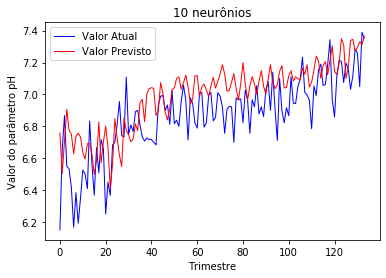

In [45]:
plt.plot(y_test, color='blue',linewidth = 1, label='Valor Atual')
plt.plot(test_predict, color='red', linewidth = 1,label='Valor Previsto')
plt.title('10 neurônios')
plt.xlabel('Trimestre')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()